# Mid Term Project
by:
Srini and Denny

<a id='content'></a>
### Table of content
<a href='#setup'>setup libraries</a>
- pandas, numpy
- sklearn

<a href='#helper_function'>helper functions</a>
- plot data

<a href='#data_functions'>data functions</a>
- interquartile
- droping tables
- transformation

<a href='#raw_data'>raw data</a>
- loading raw data
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

<a href='#analyze_raw_data'>analyze Raw Data</a>

<a href='#plot_regression'>plot regression graph</a>

<a href='#feature_importance'>feature importance</a>

<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [3016]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [3017]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [3018]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [3019]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### create dummy table for categorie

In [3020]:
def create_dummies_for_categorie(data, name):
    data = pd.get_dummies(data, columns=[name], drop_first = True)
    return data

#### perform transformation operation on data

In [3021]:
# transform operation

pwr = PowerTransformer()
robust = RobustScaler()
minMax = MinMaxScaler()

def aggregate_transform(data: pd.DataFrame, name: str, operator: str = 'pwr', lamda_value: float = 0)-> pd.DataFrame:
    transformer = pwr

    if operator == 'pwr':
        transformer = pwr
    elif operator == 'minmax':
        transformer = minMax
    elif operator == 'robust':
        transformer = robust
    if lamda_value != 0:
        transformer.lambdas_ = lamda_value
    data[name] = transformer.fit_transform(data[name].to_numpy().reshape(-1,1))
    return data


#### plot function 

In [3022]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line
def plot_train_vs_test(x_train, y_pred, x_test, y_test, y_pred_train):
    fig, ax = plt.subplots(2,3,figsize=(18,10))
    ax[0,0].plot(y_pred, y_test, 'o',color='red')
    ax[0,0].set_xlabel("y_test")
    ax[0,0].set_ylabel("y_pred")
    ax[0,0].set_title("Test Set -Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[0,1].hist(y_test - y_pred, color='red')
    ax[0,1].set_xlabel("Test y-y_pred")
    ax[0,1].set_title("Test Set Residual histogram")

    ax[0,2].plot(y_pred,y_test - y_pred,"o", color='red')
    ax[0,2].set_xlabel("predited")
    ax[0,2].set_ylabel("residuals")
    ax[0,2].set_title("Residuals by Predicted")
    ax[0,2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')



    ax[1,0].plot(y_pred_train, y_train, 'o')
    ax[1,0].set_xlabel("y_train")
    ax[1,0].set_ylabel("y_pred_train")
    ax[1,0].set_title("Train set Predicted vs real")

    # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
    # It resembles a normal distribution?
    ax[1,1].hist(y_train - y_pred_train)
    ax[1,1].set_xlabel("Train y-y_pred")
    ax[1,1].set_title("Train Residual histogram")

    ax[1,2].plot(y_pred_train,y_train - y_pred_train,"o")
    ax[1,2].set_xlabel("predited")
    ax[1,2].set_ylabel("residuals")
    ax[1,2].set_title("Residuals by Predicted -- Train set")
    ax[1,2].plot(y_pred_train,np.zeros(len(y_pred_train)),linestyle='dashed')
    

<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [3023]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [3024]:
raw_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

In [3025]:
# analyze raw data
# plot_numeric(work_copy)
#sns.pairplot(work_copy,diag_kind="kde")

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

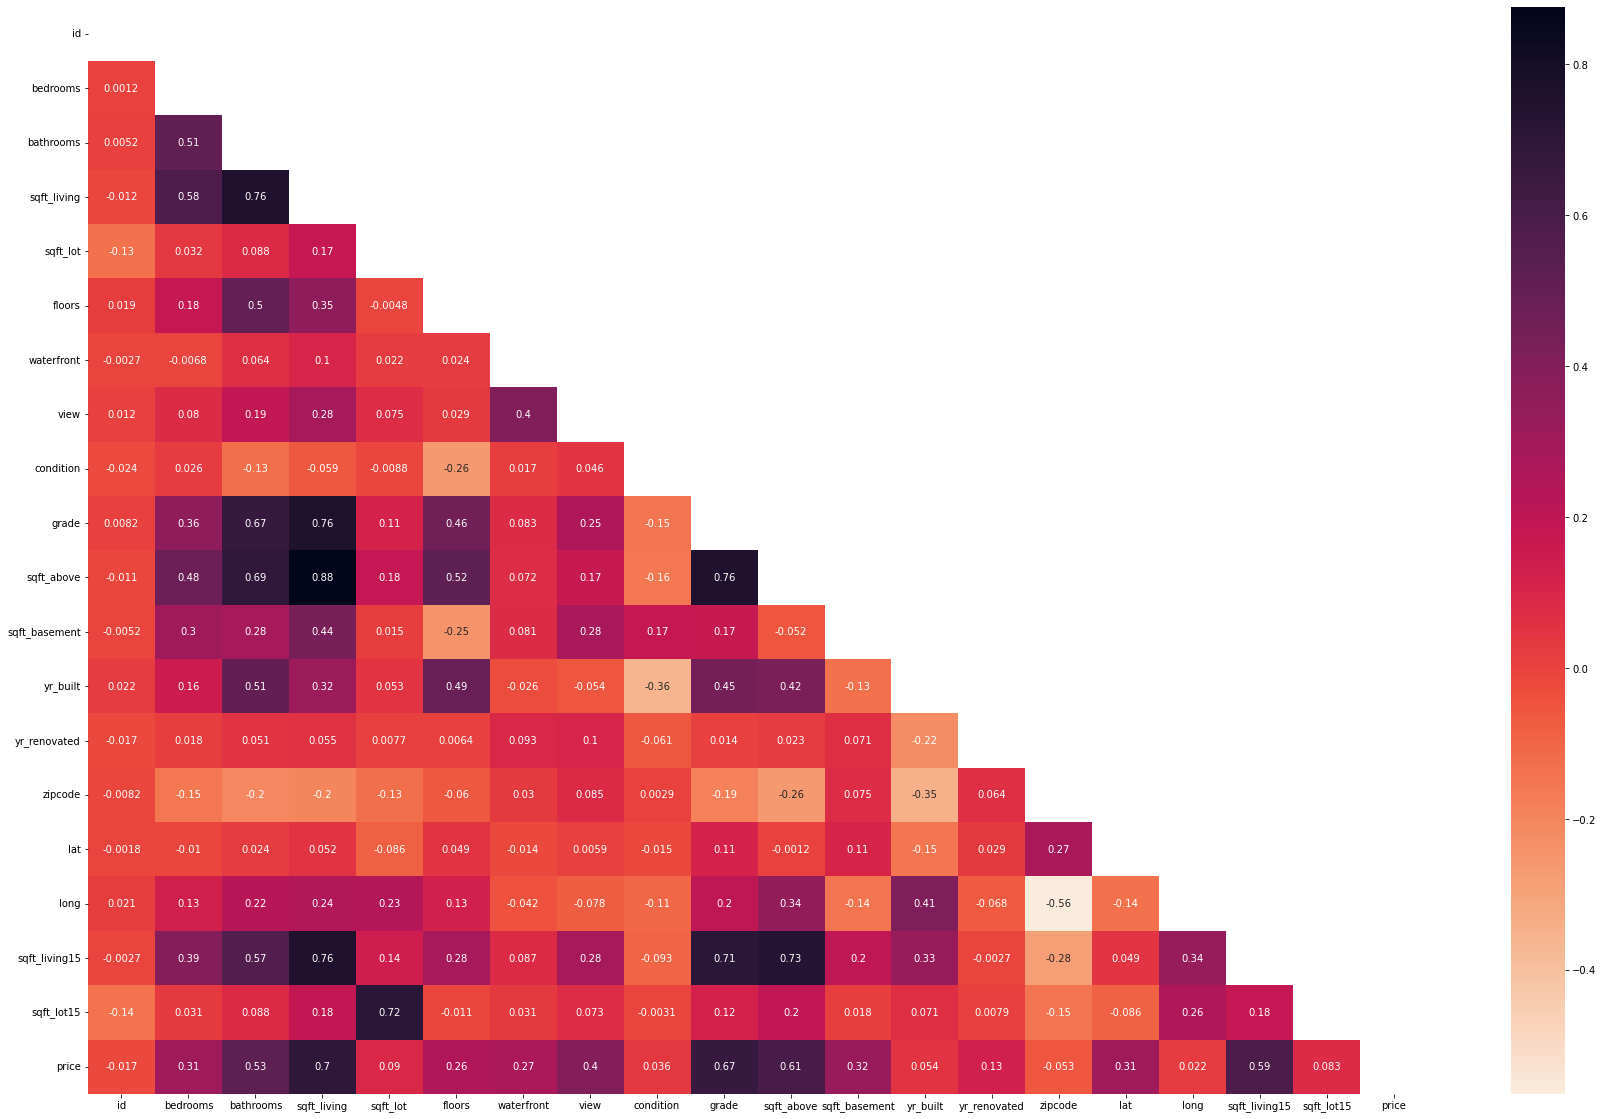

In [3026]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

<a id='analyze_raw_data'></a>
<a href='#content'>back to content list</a>
### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [3027]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'sqft_lot', 'view', 'sqft_lot15'], inplace=True)

# removed floors, sqft_living15, sqft_above, yr_renovated

In [3028]:
# droping long and lat coordinates, as this location information is allready included in the zipcodes
work_copy.drop(columns=['long', 'lat'], inplace=True)

#work_copy.drop(columns=['long'], inplace=True)

In [3029]:
# test for dropping all to fill in an input value and receive an return price
#work_copy.drop(columns=['waterfront', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'sqft_basement', 'lat','zipcode', 'condition'], inplace=True)

In [3030]:
# interquartile sqft_living

work_copy =  work_copy[work_copy['bedrooms'] != 33]
work_copy = reduce_to_interquartile(data=work_copy, name='bedrooms')

In [3031]:
#work_copy = reduce_to_interquartile(data=work_copy, name='price')
transpower = PowerTransformer(method='box-cox')
work_copy['price'] = transpower.fit_transform(work_copy['price'].to_numpy().reshape(-1,1))

In [3032]:
# basement has no real influence so i transform this to an binary has or has not field 0 or 1
work_copy['sqft_basement'].values[work_copy['sqft_basement'] != 0] = 1


In [3033]:
work_copy = create_dummies_for_categorie(work_copy, 'zipcode')

In [3034]:
work_copy = create_dummies_for_categorie(work_copy, 'grade')

In [3035]:
work_copy = create_dummies_for_categorie(work_copy, 'floors')

In [3036]:
work_copy = create_dummies_for_categorie(work_copy, 'bedrooms')

In [3037]:
work_copy = create_dummies_for_categorie(work_copy, 'condition')

In [3038]:
#plot_numeric(work_copy)

#sns.pairplot(work_copy,diag_kind="kde")

In [3039]:
work_copy.describe()

,bathrooms,sqft_living,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,price,zipcode_98002,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,2.106700e+04,21067.000000,...,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000,21067.000000
mean,2.108618,2070.654673,0.007310,1785.008069,0.390469,1971.408079,82.240566,1987.000475,-1.387290e-14,0.008924,...,0.006740,0.028575,0.000285,0.466322,0.326672,0.075996,0.007452,0.650211,0.262448,0.078749
std,0.746090,889.352191,0.085188,812.864414,0.487867,29.210838,396.748216,682.127232,1.000024e+00,0.094046,...,0.081825,0.166614,0.016874,0.498876,0.469007,0.264997,0.086007,0.476914,0.439975,0.269353
min,0.500000,440.000000,0.000000,440.000000,0.000000,1900.000000,0.000000,399.000000,-4.248885e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1430.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,-6.739056e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,1910.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,4.363233e-03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,2530.000000,0.000000,2200.000000,1.000000,1997.000000,0.000000,2360.000000,6.653952e-01,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,10040.000000,1.000000,8020.000000,1.000000,2015.000000,2015.000000,6210.000000,3.957004e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### First Approach with unfilterd data

In [3040]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [3041]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.20, random_state= 42)

In [3042]:
x_train.describe()

,bathrooms,sqft_living,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,zipcode_98002,zipcode_98003,...,floors_2.5,floors_3.0,floors_3.5,bedrooms_3,bedrooms_4,bedrooms_5,condition_2,condition_3,condition_4,condition_5
count,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,...,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000,16853.000000
mean,2.105471,2069.237465,0.007714,1782.317748,0.390850,1971.392512,83.142467,1984.899246,0.008604,0.012639,...,0.006646,0.028304,0.000237,0.467573,0.325995,0.075951,0.007239,0.650745,0.261140,0.079808
std,0.743450,885.974953,0.087491,807.961258,0.487955,29.234035,398.823376,681.530864,0.092360,0.111713,...,0.081252,0.165844,0.015405,0.498962,0.468759,0.264927,0.084777,0.476749,0.439269,0.271003
min,0.500000,440.000000,0.000000,440.000000,0.000000,1900.000000,0.000000,399.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1430.000000,0.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.250000,1910.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.500000,2540.000000,0.000000,2200.000000,1.000000,1997.000000,0.000000,2360.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,10040.000000,1.000000,8020.000000,1.000000,2015.000000,2015.000000,6110.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3043]:
scaler_train = StandardScaler().fit(x_train)
#scaler_train = RobustScaler().fit(x_train)
#scaler_train = MinMaxScaler().fit(x_train)



scaler_train.transform(x_train)
scaler_train.transform(x_test)


array([[ 0.53068922,  0.05729738, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.86696932,  0.41849212, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.19440912, -0.12329999, -0.08816873, ..., -1.36500359,
         1.68206925, -0.29449861],
       ...,
       [ 0.53068922,  0.04601004, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922,  0.29433143, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861],
       [ 0.53068922, -0.60865543, -0.08816873, ...,  0.73259881,
        -0.59450584, -0.29449861]])

In [3044]:
model_l = LinearRegression()
#model_l = Lasso()

model_l.fit(x_train, y_train)

LinearRegression()

In [3045]:
y_pred_train = model_l.predict(x_train)
y_pred_test = model_l.predict(x_test)


In [3046]:
x_train_sm = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train_sm).fit()

#model.summary()
model.summary2()

/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.860     
Dependent Variable: y                AIC:                14811.7831
Date:               2021-11-16 18:20 BIC:                15577.2792
No. Observations:   16853            Log-Likelihood:     -7306.9   
Df Model:           98               F-statistic:        1056.     
Df Residuals:       16754            Prob (F-statistic): 0.00      
R-squared:          0.861            Scale:              0.14018   
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const           -0.8423    0.3876  -2.1730  0.0298  -1.6020  -0.0825
bathrooms        0.0860    0.0072  11.8761  0.0000   0.0718   0.1002
sqft_living      0.0002    0.0000  16.5259  0.0000   0.0002   0.0002
waterfront       1.0498    0.0345  30.4115  0.0000   0.9821   1.1174
sqft_above       0.0002    0.0000  12.7690  0.0000   0.0002   0.0002
sqft_basement    0.0727    0.0115   6.3120  0.0000   0.0501   0.0952
yr_built        -0.0014    0.0002  -7.5283  0.0000  -0.0018  -0.0011
yr_renovated     0.0001    0.0000   8.0027  0.0000   0.0000   0.0001
sqft_living15    0.0002    0.0000  25.4144  0.0000   0.0002   0.0002
zipcode_98002   -0.0915    0.0384  -2.3808  0.0173  -0.1668  -0.0162
zipcode_98003    0.0169    0.0341   0.4954  0.6203  -0.0499   0.0837
zipcode_98004    1.9760    0.0331  59.6547  0.0000   1.9111   2.0409
zipcode_98005    1.3872    0.0408  34.0180  0.0000   1.3073   1.4671
zipcode_98006    1.2216    0.0301  40.5868  0.0000   1.1626   1.2806
zipcode_98007    1.2704    0.0433  29.3399  0.0000   1.1855   1.3552
zipcode_98008    1.2872    0.0339  37.9419  0.0000   1.2207   1.3537
zipcode_98010    0.5837    0.0474  12.3269  0.0000   0.4909   0.6765
zipcode_98011    0.8770    0.0380  23.0507  0.0000   0.8025   0.9516
zipcode_98014    0.7272    0.0444  16.3880  0.0000   0.6402   0.8142
zipcode_98019    0.6716    0.0386  17.3797  0.0000   0.5958   0.7473
zipcode_98022    0.2247    0.0361   6.2287  0.0000   0.1540   0.2954
zipcode_98023   -0.1142    0.0293  -3.8983  0.0001  -0.1717  -0.0568
zipcode_98024    0.9799    0.0545  17.9760  0.0000   0.8731   1.0868
zipcode_98027    1.0156    0.0309  32.9112  0.0000   0.9551   1.0760
zipcode_98028    0.8230    0.0334  24.6401  0.0000   0.7575   0.8885
zipcode_98029    1.1556    0.0329  35.0938  0.0000   1.0911   1.2202
zipcode_98030    0.0957    0.0339   2.8259  0.0047   0.0293   0.1621
zipcode_98031    0.1216    0.0340   3.5771  0.0003   0.0550   0.1882
zipcode_98032   -0.0973    0.0447  -2.1750  0.0296  -0.1849  -0.0096
zipcode_98033    1.4919    0.0304  49.1249  0.0000   1.4324   1.5514
zipcode_98034    1.0807    0.0289  37.3803  0.0000   1.0240   1.1373
zipcode_98038    0.3475    0.0284  12.2549  0.0000   0.2919   0.4031
zipcode_98039    2.0605    0.0640  32.1802  0.0000   1.9350   2.1860
zipcode_98040    1.5989    0.0345  46.3822  0.0000   1.5313   1.6665
zipcode_98042    0.1186    0.0287   4.1275  0.0000   0.0623   0.1750
zipcode_98045    0.7257    0.0362  20.0472  0.0000   0.6547   0.7966
zipcode_98052    1.2205    0.0288  42.3998  0.0000   1.1640   1.2769
zipcode_98053    1.1446    0.0308  37.1361  0.0000   1.0842   1.2050
zipcode_98055    0.2674    0.0344   7.7673  0.0000   0.2000   0.3349
zipcode_98056    0.6427    0.0306  21.0310  0.0000   0.5828   0.7026
zipcode_98058    0.3183    0.0300  10.6122  0.0000   0.2595   0.3771
zipcode_98059    0.6645    0.0296  22.4425  0.0000   0.6064   0.7225
zipcode_98065    0.8144    0.0332  24.5040  0.0000   0.7492   0.8795
zipcode_98070    0.8651    0.0451  19.1948  0.0000   0.7767   0.9534
zipcode_98072    0.9694    0.0342  28.3357  0.0000   0.9023   1.0364
zipcode_98074    1.0749    0.0304  35.4015  0

<a id='plot_regression'></a>
<a href='#content'>back to content list</a>
### Plot Regression Graph

In [3047]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test})

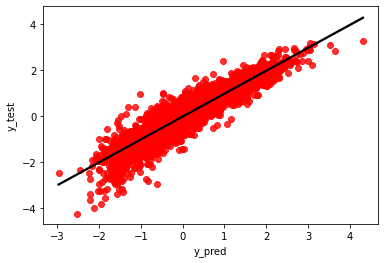

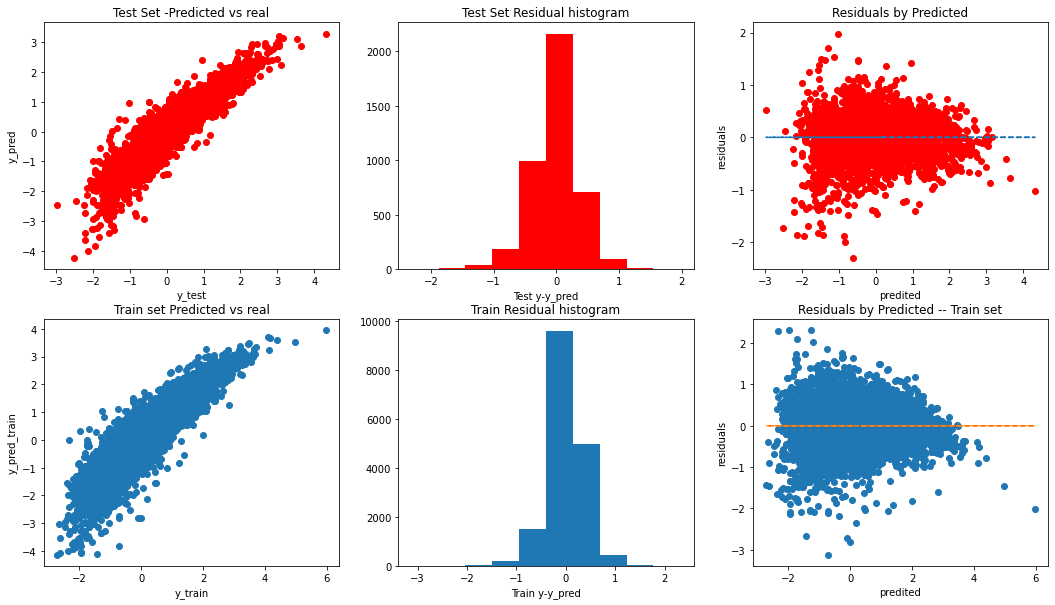

In [3048]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plot_train_vs_test(x_train=x_train,y_pred= y_pred_test, x_test=x_test, y_test=y_test, y_pred_train=y_pred_train)

<a id='feature_importance'></a>
<a href='#content'>back to content list</a>

In [3049]:
features_importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model_l.coef_)
})


# seperate features
zip_mean = features_importances[features_importances['Attribute'].str.startswith('zip') == True]
grade_mean = features_importances[features_importances['Attribute'].str.startswith('grade') == True]
floors_mean = features_importances[features_importances['Attribute'].str.startswith('floor') == True]
condition_mean = features_importances[features_importances['Attribute'].str.startswith('condition') == True]
bedrooms_mean = features_importances[features_importances['Attribute'].str.startswith('bedroom') == True]

# drop this features from table
features_importances = features_importances[features_importances['Attribute'].str.startswith('zip') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('grade') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('floor') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('condition') != True]
features_importances = features_importances[features_importances['Attribute'].str.startswith('bedroom') != True]


# add packed features with mean value to the featue list
features_importances.loc[features_importances.index.max() + 1] = ['grade', grade_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['zipcode', zip_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['floors', floors_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['condition', condition_mean['Importance'].values.mean()]
features_importances.loc[features_importances.index.max() + 1] = ['bedrooms', bedrooms_mean['Importance'].values.mean()]

# sort and print
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,waterfront,1.049774
9,zipcode,0.936256
8,grade,0.891811
11,condition,0.404138
10,floors,0.097035
0,bathrooms,0.085989
4,sqft_basement,0.072679
12,bedrooms,0.037352
5,yr_built,0.001420
1,sqft_living,0.000223


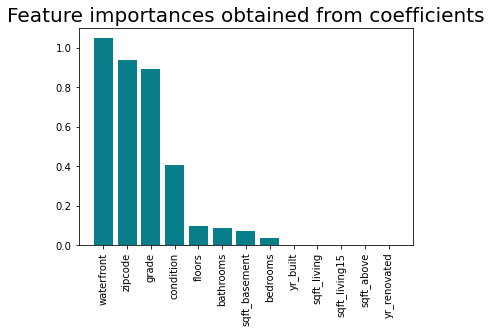

In [3050]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [3051]:
R2_train=r2_score(y_train,y_pred_train)
R2_test=r2_score(y_test,y_pred_test)
print(R2_train)
print(R2_test)

0.860702712776614
0.8599582707868051
